![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/visual-nlp/1.2.Image_processing.ipynb)

## Blogposts and videos

- [Text Detection in Spark OCR](https://medium.com/spark-nlp/text-detection-in-spark-ocr-dcd8002bdc97)

- [Table Detection & Extraction in Spark OCR](https://medium.com/spark-nlp/table-detection-extraction-in-spark-ocr-50765c6cedc9)

- [Extract Tabular Data from PDF in Spark OCR](https://medium.com/spark-nlp/extract-tabular-data-from-pdf-in-spark-ocr-b02136bc0fcb)

- [Signature Detection in Spark OCR](https://medium.com/spark-nlp/signature-detection-in-spark-ocr-32f9e6f91e3c)

- [GPU image pre-processing in Spark OCR](https://medium.com/spark-nlp/gpu-image-pre-processing-in-spark-ocr-3-1-0-6fc27560a9bb)

- [How to Setup Spark OCR on UBUNTU - Video](https://www.youtube.com/watch?v=cmt4WIcL0nI)


**More examples here**

https://github.com/JohnSnowLabs/spark-ocr-workshop

### Colab Setup

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
!pip install -q johnsnowlabs

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

In [ ]:
from johnsnowlabs import nlp, visual

# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
nlp.settings.enforce_versions=True
nlp.install(refresh_install=True, visual=True, hardware_platform='gpu')

In [ ]:
# Automatically load license data and start a session with all jars user has access to
spark = nlp.start(visual=True, hardware_target="gpu")

Spark Session already created, some configs may not take.
👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_9005.json


In [ ]:
import pkg_resources
import pandas as pd
from pyspark.ml import PipelineModel
from pyspark.sql import functions as F

## Read image


    Image #0:
    Origin: file:/usr/local/lib/python3.10/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


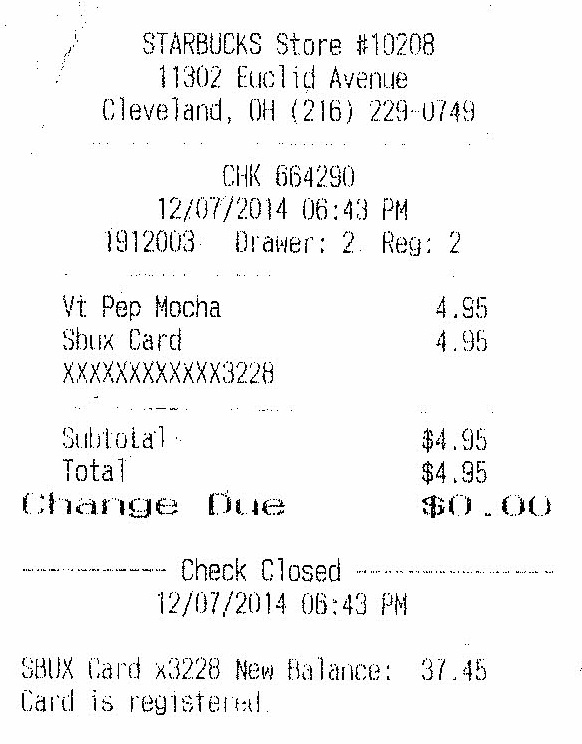

In [ ]:
image_path = pkg_resources.resource_filename('sparkocr', 'resources/ocr/images/check.jpg')
image_example_df = spark.read.format("binaryFile").load(image_path)
image_df = visual.BinaryToImage().transform(image_example_df).cache()

visual.display_images(image_df)

## Scaling


    Image #0:
    Origin: file:/usr/local/lib/python3.10/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 1164 px
    Height: 1488 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


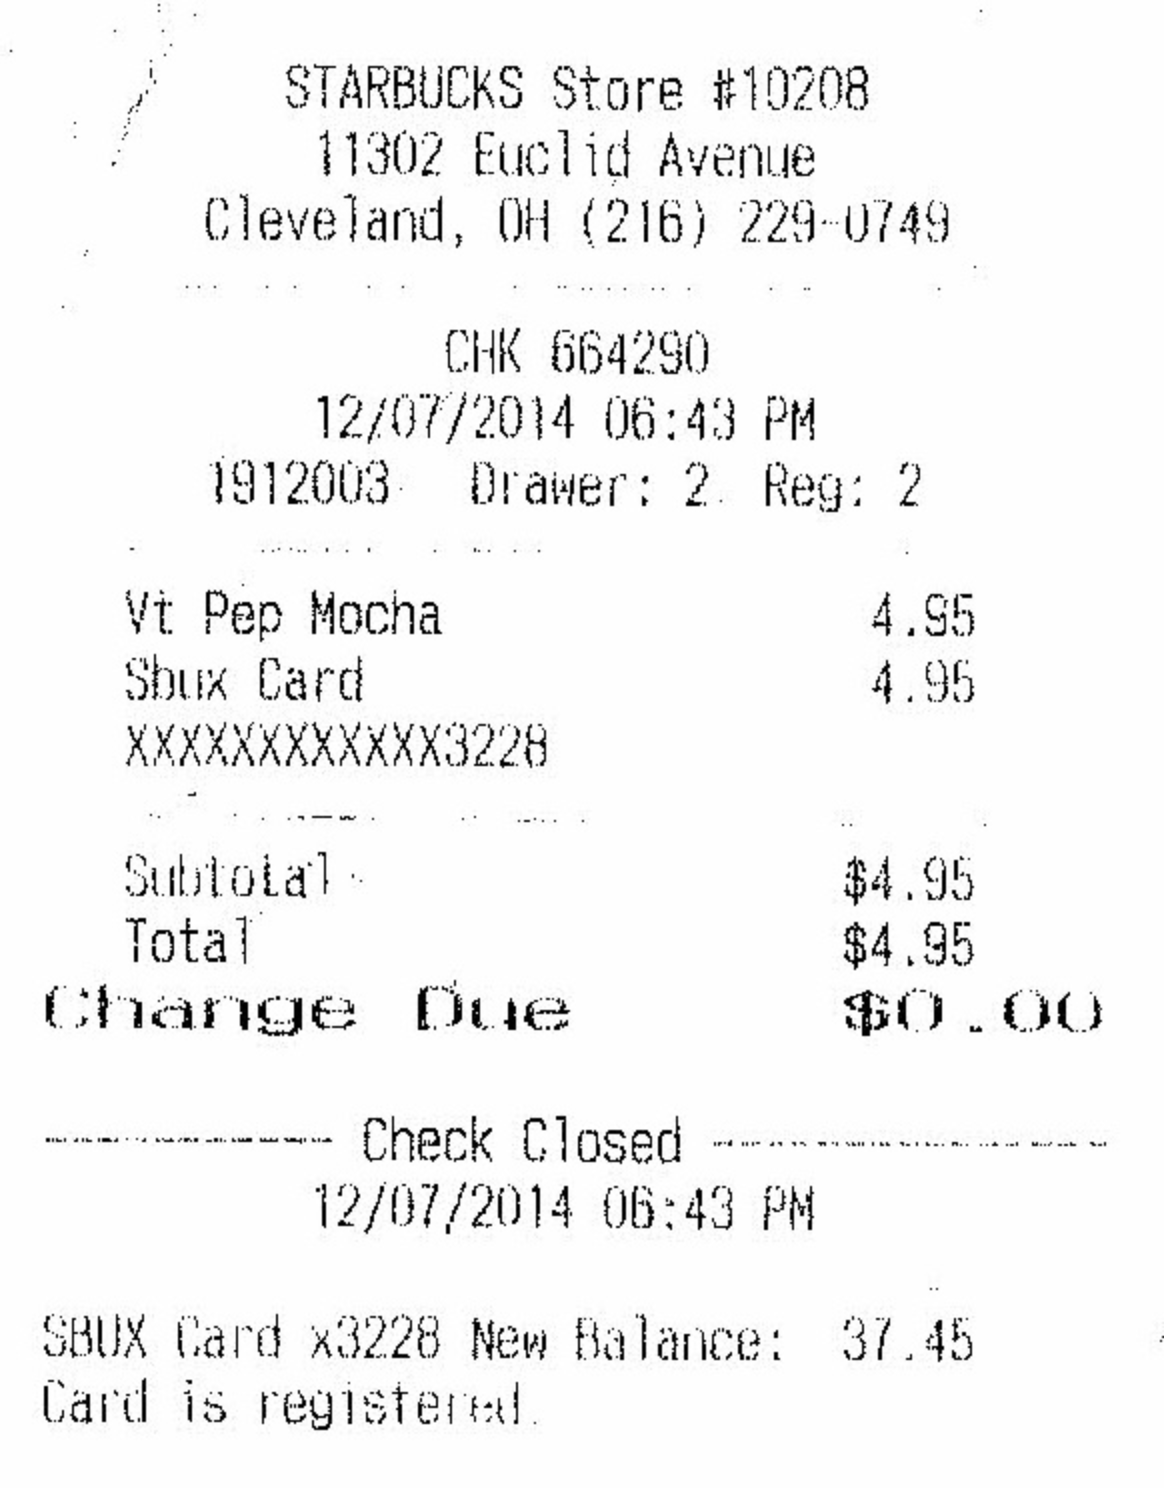

In [ ]:
scaled_image_df = visual.ImageTransformer() \
    .addScalingTransform(2) \
    .setInputCol("image") \
    .setOutputCol("scaled_image") \
    .setImageType(visual.ImageType.TYPE_BYTE_GRAY) \
    .transform(image_df)

visual.display_images(scaled_image_df, "scaled_image")

## Image Adaptive Thresholding


    Image #0:
    Origin: file:/usr/local/lib/python3.10/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


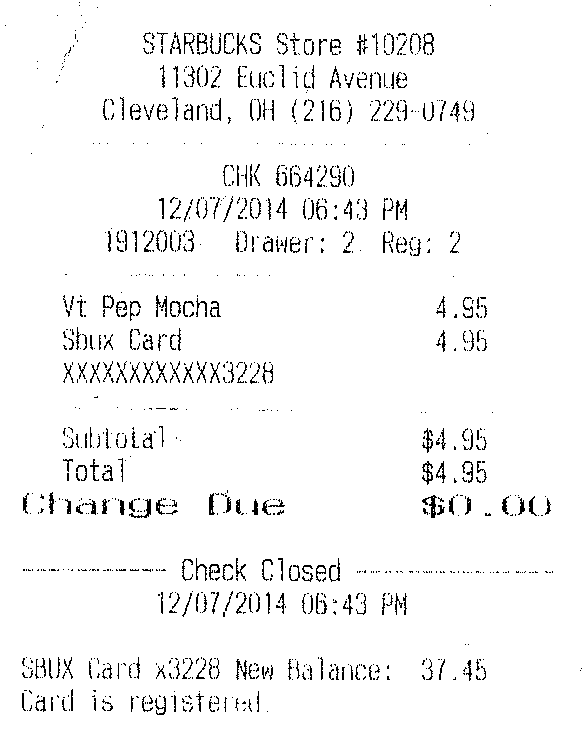

In [ ]:
thresholded_image = visual.ImageTransformer() \
    .addAdaptiveThreshold(21, 20)\
    .setInputCol("image") \
    .setOutputCol("thresholded_image") \
    .transform(image_df)

visual.display_images(thresholded_image, "thresholded_image")

## Erosion


    Image #0:
    Origin: file:/usr/local/lib/python3.10/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


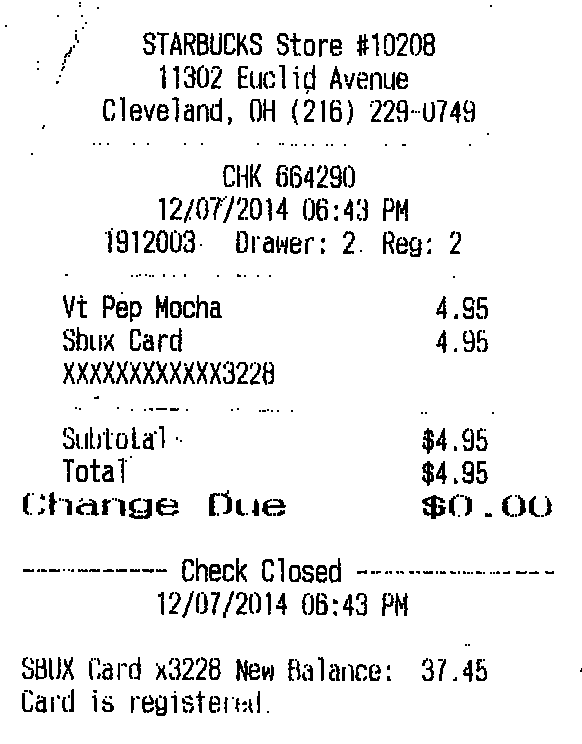

In [ ]:
eroded_image = visual.ImageTransformer() \
.addErodeTransform(2,2)\
.setInputCol("image") \
.setOutputCol("eroded_image") \
.transform(image_df)

visual.display_images(eroded_image, "eroded_image")

## Dilation


    Image #0:
    Origin: file:/usr/local/lib/python3.10/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


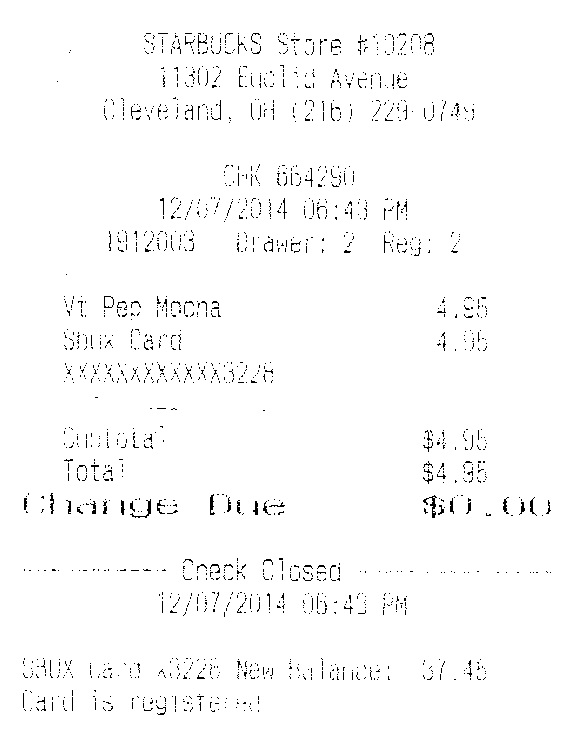

In [ ]:
dilated_image = visual.ImageTransformer() \
.addDilateTransform(1, 2)\
.setInputCol("image") \
.setOutputCol("dilated_image") \
.transform(image_df)

visual.display_images(dilated_image, "dilated_image")

## Remove Objects


    Image #0:
    Origin: file:/usr/local/lib/python3.10/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 1164 px
    Height: 1488 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


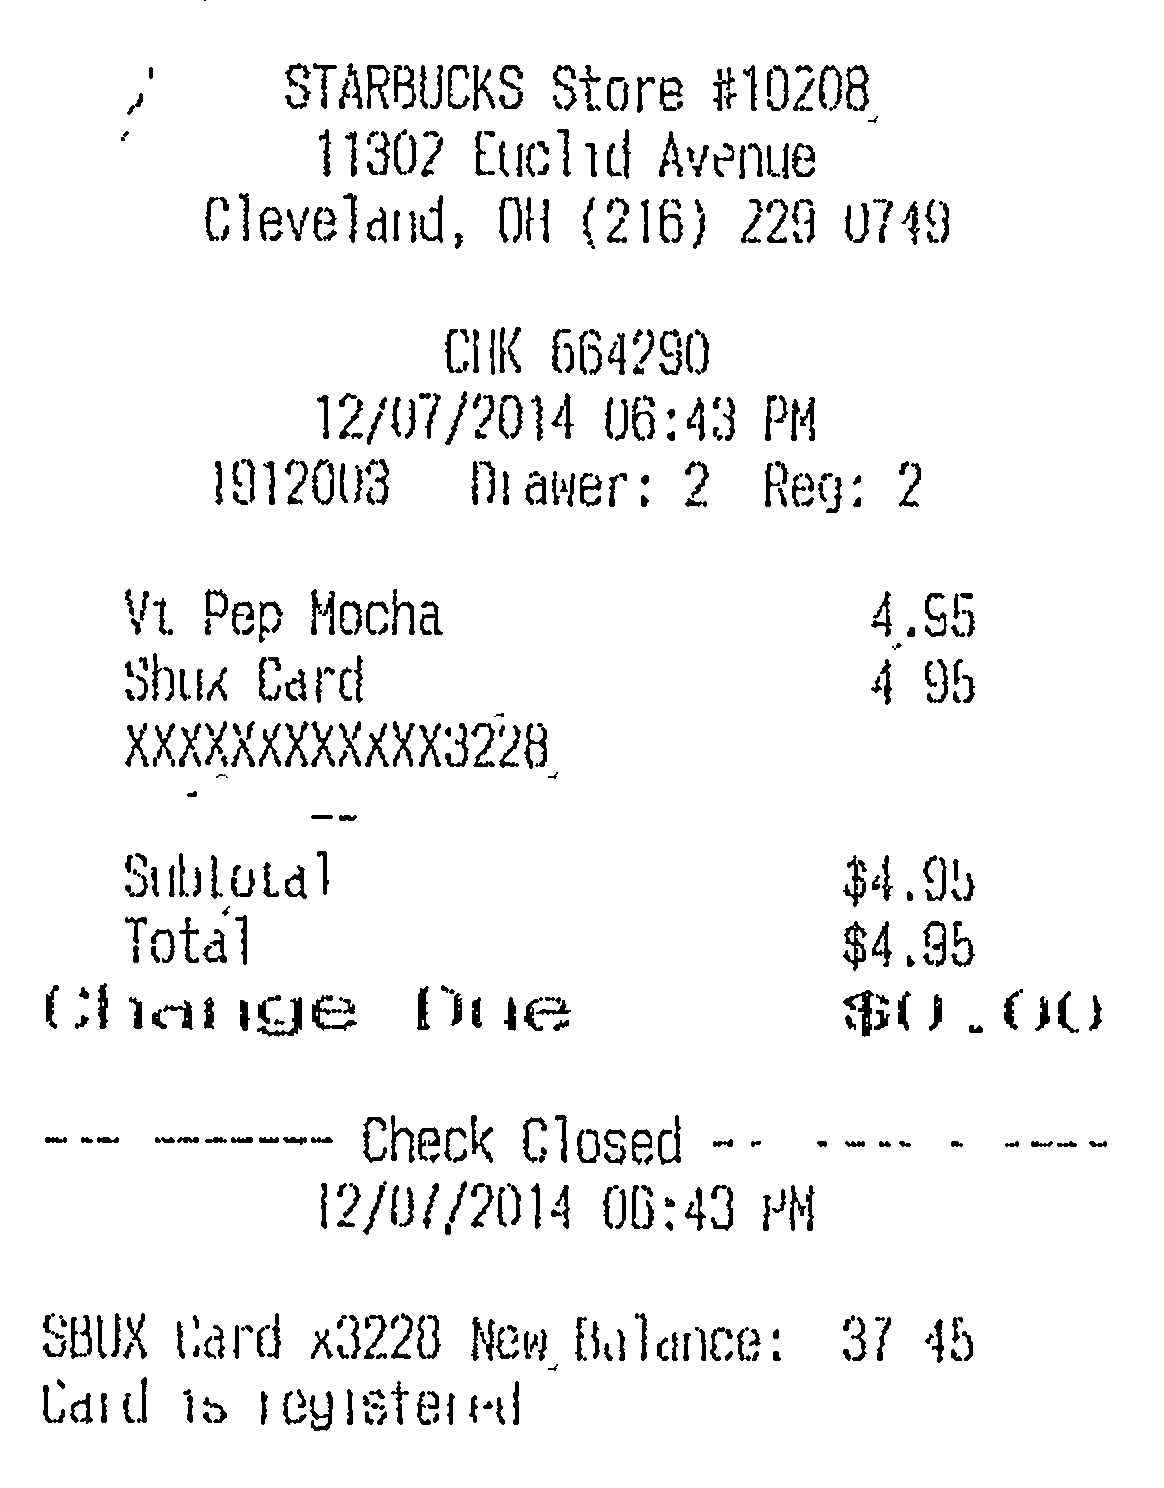

In [ ]:
corrected_image = visual.ImageTransformer() \
    .addScalingTransform(2) \
    .addAdaptiveThreshold(31, 2)\
    .addRemoveObjects(10, 500) \
    .setInputCol("image") \
    .setOutputCol("corrected_image") \
    .transform(image_df)

visual.display_images(corrected_image, "corrected_image")

## Median Blur


    Image #0:
    Origin: file:/usr/local/lib/python3.10/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 1164 px
    Height: 1488 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


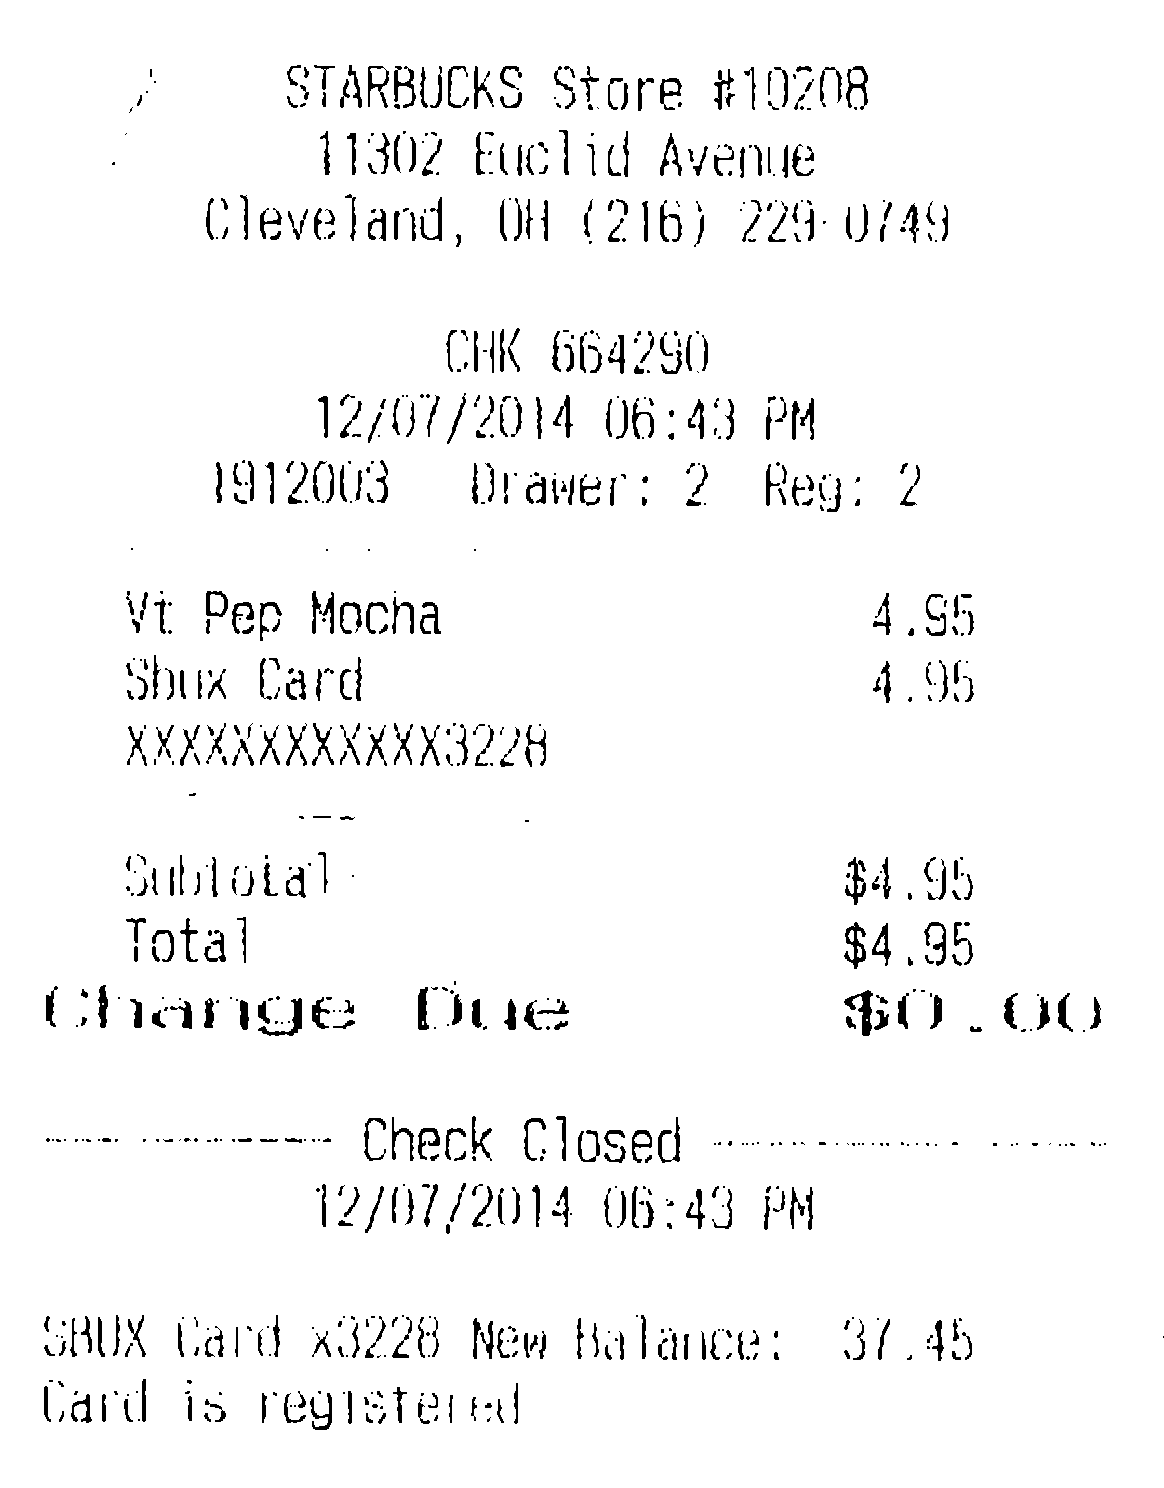

In [ ]:
corrected_image = visual.ImageTransformer() \
    .addScalingTransform(2) \
    .addMedianBlur(3) \
    .setInputCol("image") \
    .setOutputCol("corrected_image") \
    .transform(image_df)

visual.display_images(corrected_image, "corrected_image")

## GPU Image transformation

GPUImageTransformer allows to run image pre-processing operations on GPU.

It supports the following operations:

- Scaling
- Otsu thresholding
- Huang thresholding
- Erosion
- Dilation

Here is a sample code snippet:



```
multiple_image = visual.GPUImageTransformer() \
    .addScalingTransform(8) \
    .addOtsuTransform() \
    .addErodeTransform(3, 3) \
    .setInputCol("image") \
    .setOutputCol("multiple_image") \
    .transform(image_df)

visual.display_images(multiple_image, "multiple_image")

```

